# Classifying Fashion-MNIST

Lets build and train a neural network. we'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, we'll build your own neural network. 

First off, let's load the dataset through torchvision.


In [3]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

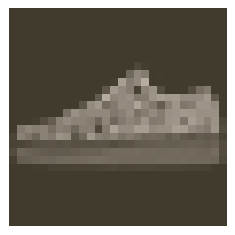

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here we should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass.

In [5]:
# Defining the network architecture

from torch import nn
from torch import optim
import torch.nn.functional as F

input_size = 784
hidden_sizes = [256,128,64]          
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1],hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))

# Train the network

Now we will create your network and train it. First you'll want to define the criterion and the optmizer

Then write the training code.

we will later try adjusting the hyperparameters (hidden units, learning rate, etc)

In [6]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [7]:
epochs=10

for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        images= images.reshape(images.shape[0],-1)
        optimizer.zero_grad()  # setting the gradient to 0 for every iteration so that it doesnt retain gradient from previous batches
        output= model(images)
        Loss= criterion(output,labels)
        Loss.backward()
        optimizer.step()
        running_loss+= Loss.item()
        
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5104099324803109
Training loss: 0.3919566776246023
Training loss: 0.35131114205794295
Training loss: 0.33394703039450685
Training loss: 0.3145276668674148
Training loss: 0.30008797902764794
Training loss: 0.293196404086692
Training loss: 0.28359997046908847
Training loss: 0.2756675399029687
Training loss: 0.26610765772968975


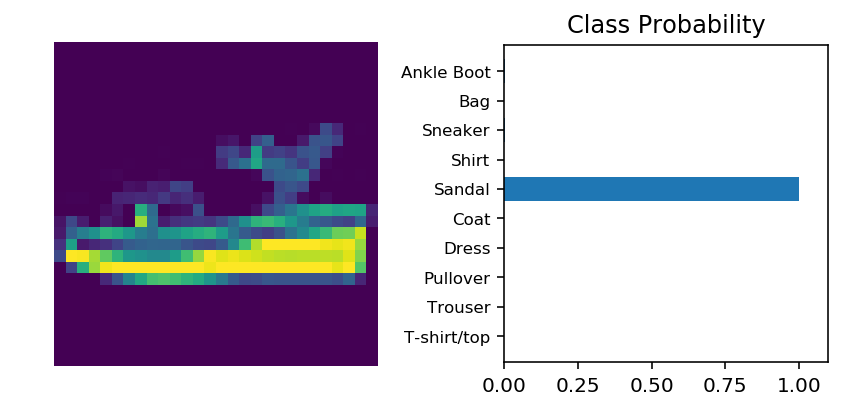

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Testing out our network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

log_softmax = model(img)
ps = torch.exp(log_softmax)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')